#IMPORT LIBRARY and CONNECTED DRIVE

In [1]:
!PYTHONHASHSEED=0

In [2]:
# Import TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
keras.__version__
from tensorflow.keras import layers
from keras.preprocessing.image import *

In [3]:
# Import other modules
from matplotlib import pyplot as plt
import zipfile
from shutil import copyfile
from time import time
import numpy as np
import random as python_random
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization


In [4]:
np.random.seed(0)
python_random.seed(0)
tf.random.set_seed(0)

Link to my drive Folder

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#EXTRACTED AND PREPARATION DATA


*   Call dataset through the url
*   find The name of folder.zip which contain each type of flowers
*   Download the file
*   Extract the file, which will be our image data set


In [6]:
import urllib.request
import tarfile

# URL del dataset
url = "http://download.tensorflow.org/example_images/flower_photos.tgz"

# Percorso di destinazione per il download
file_name = "flower_photos.tgz"

# Download del file
urllib.request.urlretrieve(url, file_name)

# Estrazione del file
tar = tarfile.open(file_name)
tar.extractall()
tar.close()

check the content into flower photos folder

In [7]:
from glob import glob
glob("flower_photos/*/", recursive = True)

['flower_photos/dandelion/',
 'flower_photos/tulips/',
 'flower_photos/daisy/',
 'flower_photos/roses/',
 'flower_photos/sunflowers/']

Number of images in each subdirectory

In [ ]:
import os, os.path
DIR = 'flower_photos/sunflowers/'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

699


In [ ]:
import os, os.path
DIR = 'flower_photos/daisy/'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

633


In [ ]:
import os, os.path
DIR = 'flower_photos/dandelion/'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

898


In [ ]:
import os, os.path
DIR = 'flower_photos/tulips/'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

799


In [ ]:
import os, os.path
DIR = 'flower_photos/roses/'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

641


Install ad import Split-folders library to split our data image set in 3 different sub data set:


1.   Train Set
2.   Validitation

1.   Test set

We have to set up a percentage of data to consider in each set of data.
splitfolders.ratio : TS = 0.7(70%) ; VS = 0.2 (20%) , TeS = 0.1(10%)

In [8]:
!pip install split-folders
import splitfolders
splitfolders.ratio('flower_photos', output="flower_split", seed=1337, ratio=(0.7, 0.2, 0.1))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 3670 files [00:00, 5003.49 files/s]


In [9]:
base_path = 'flower_split'

Part of the Keras preprocessing module and is used to create a tf.data.Dataset object from image files organized in a directory structure.

path= path where find the image for this data set

image size = set up image size ( 224, 224 ) height and width

color mode = set up the color mode for the image

label_mode= type of date

Batch size , number sample of image for each iterations

Validation_split indica la percentuale di dati che va nelle validation data set

## TRAIN

In [10]:
train_dataset = keras.preprocessing.image_dataset_from_directory(base_path+'/train',
                                                           image_size=(224,224),
                                                                 color_mode='rgb',
                                                                 label_mode='categorical',
                                                                 batch_size=32,
                                                                 validation_split = False,
                                                                 shuffle=True,
                                                                 seed=1)

Found 2567 files belonging to 5 classes.


## VALIDATION

In [11]:
val_dataset = keras.preprocessing.image_dataset_from_directory(base_path+'/val',
                                                           image_size=(224,224),
                                                                 color_mode='rgb',
                                                                 label_mode='categorical',
                                                                 batch_size=32,
                                                                 validation_split = False,
                                                                 shuffle=True,
                                                                 seed=1)

Found 731 files belonging to 5 classes.


In [12]:
test_dataset = keras.preprocessing.image_dataset_from_directory(base_path+'/test',
                                                                 image_size=(224,224),
                                                                 color_mode='rgb',
                                                                 label_mode='categorical',
                                                                 batch_size=32,
                                                                 validation_split = False,
                                                                 shuffle=True,
                                                                 seed=1)

Found 372 files belonging to 5 classes.


In [13]:
class_names = train_dataset.class_names
print(class_names)
num_classes=5

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## SHOW DATA

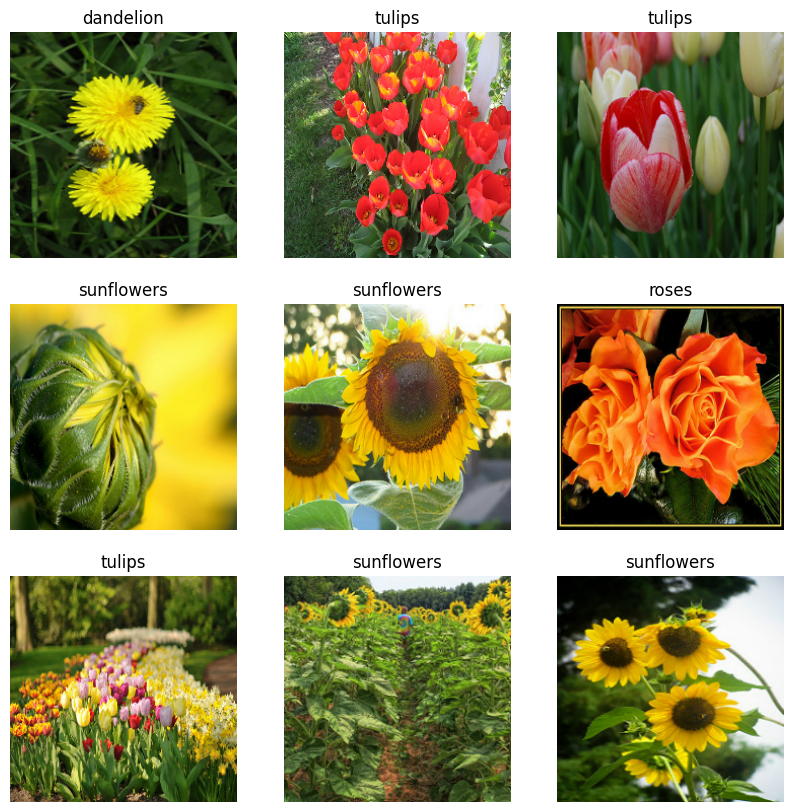

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i], axis=None, out=None)])
    plt.axis("off")

Through keras library we recall an apllications model called ResNet50 , which is a pre-setting neural model to learn our train set.


1.   Input shape = size of images , height , width and layer of colors
2.   weights =  imagenet is a pre-trained weigth which learned from a Large data set of images. From this setting we can earn several benefit to recognize the images

1.  include_top = This gives you more flexibility to customize the model architecture, including the input size.
2.   pooling = The choice of pooling operation Max Pooling is often preferred in tasks like image classification, where identifying the most dominant features is crucial

In [14]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

##  MODEL (1)

- (224, 224, 3) To denote  width, height e channel numbers of the images.
- Firts block:

>> - Conv2d: 32 number of filter , 3 dimension of each fiter ( 3x3), padding = 'same' to keep same image's dim in output, regularizers to limit the overfitting.
- BatchNomalization: to Normalize the value,
- Activation layer : reLu to have non-linearity
- MaxPooling2D : to reduce the size

- Second Block: same the first block , only diferrente 64 filters
- Samne third Block
- GlobalMax pooling to reduce the output in 1 - dimensione array
- Dense layer , number of hiding filters, fully connected









In [ ]:
inputs = keras.Input((224,224,3))
x = inputs

x = keras.layers.Conv2D(32, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.AveragePooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

x = keras.layers.Activation("relu")(x)
x = keras.layers.AveragePooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding="same",kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(256, activation="relu")(x)


outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
netWa = keras.Model(inputs, outputs)

###RMSprop Optimizator

In [ ]:
netWa.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adadelta(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
history = netWa.fit(train_dataset,
                 epochs=40,
                 validation_data=val_dataset,
                 callbacks=callback)

Epoch 1/30
81/81 [==============================] - 23s 115ms/step - loss: 1.3043 - accuracy: 0.5279 - val_loss: 1.4636 - val_accuracy: 0.4952
Epoch 2/30
81/81 [==============================] - 7s 81ms/step - loss: 1.0593 - accuracy: 0.6377 - val_loss: 1.2841 - val_accuracy: 0.5445
Epoch 3/30
81/81 [==============================] - 9s 104ms/step - loss: 0.9572 - accuracy: 0.6993 - val_loss: 1.0966 - val_accuracy: 0.6443
Epoch 4/30
81/81 [==============================] - 7s 82ms/step - loss: 0.9125 - accuracy: 0.7109 - val_loss: 1.0754 - val_accuracy: 0.6183
Epoch 5/30
81/81 [==============================] - 9s 104ms/step - loss: 0.8653 - accuracy: 0.7281 - val_loss: 1.0025 - val_accuracy: 0.6471
Epoch 6/30
81/81 [==============================] - 8s 99ms/step - loss: 0.8110 - accuracy: 0.7600 - val_loss: 1.0027 - val_accuracy: 0.6512
Epoch 7/30
81/81 [==============================] - 7s 84ms/step - loss: 0.7832 - accuracy: 0.7659 - val_loss: 0.9777 - val_accuracy: 0.6512
Epoch 8/3

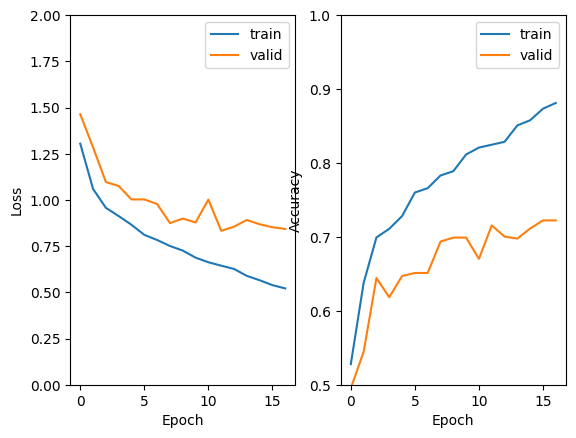

In [ ]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

In [ ]:
loss, accuracy = netWa.evaluate(test_dataset)

12/12 [==============================] - 1s 53ms/step - loss: 0.8531 - accuracy: 0.7312


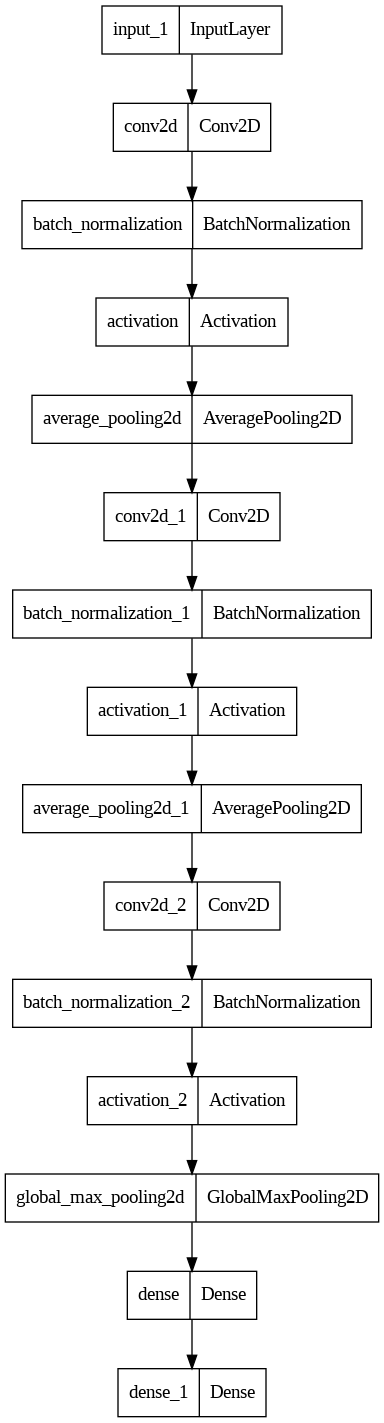

In [ ]:
keras.utils.plot_model(netWa, to_file="netWa.png")

In [ ]:
netWa.save('/content/drive/MyDrive/Deep_Learning/netWa.h5')

net1.save('')

DATA AUGMENTATION

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal",seed=4),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1)
    ]
)

View e.g of augmented data.

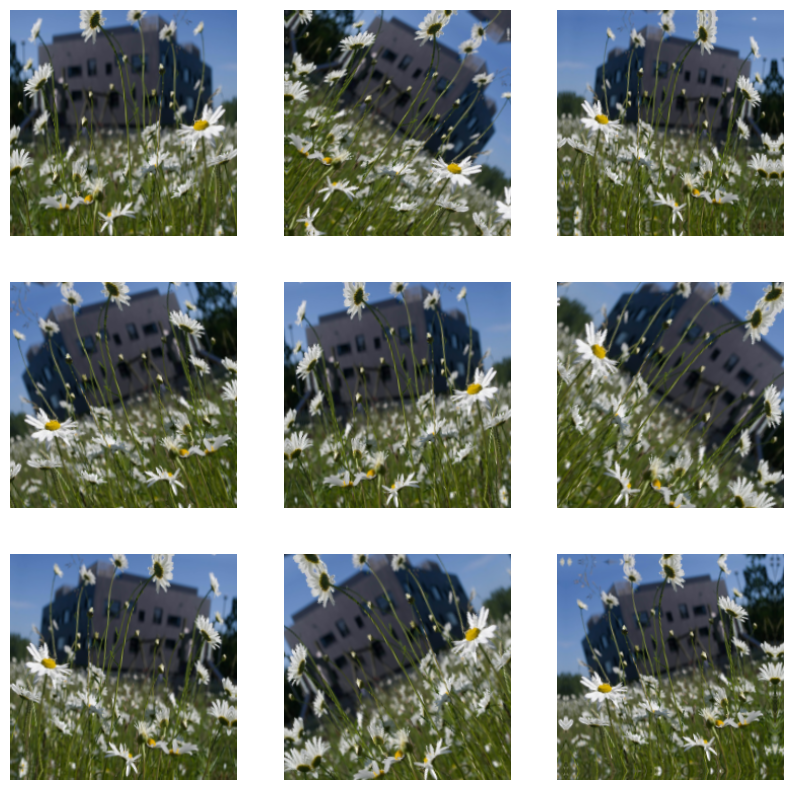

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[1]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

Model With Augmetantion

In [ ]:

inputs = keras.Input((224,224,3))
x = inputs
x = data_augmentation(x)

x = keras.layers.Conv2D(32, 5, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.AveragePooling2D(3, strides=3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.AveragePooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 5, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.AveragePooling2D(3, strides=3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.AveragePooling2D(3, strides=3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(128, 5, padding="same",kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.AveragePooling2D(3, strides=3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Dense(512, activation="relu")(x)

outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
net1 = keras.Model(inputs, outputs)

### RMSprop Optimazator

In [ ]:
net1.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adam(learning_rate=0.0001),
            metrics=['accuracy'])

In [ ]:
history = net1.fit(train_dataset,
                 epochs=40,
                 validation_data=val_dataset,
                 callbacks=[callback])

Epoch 1/40
81/81 [==============================] - 14s 91ms/step - loss: 1.3939 - accuracy: 0.4725 - val_loss: 1.6726 - val_accuracy: 0.3666
Epoch 2/40
81/81 [==============================] - 9s 104ms/step - loss: 1.2015 - accuracy: 0.5886 - val_loss: 1.5274 - val_accuracy: 0.4596
Epoch 3/40
81/81 [==============================] - 7s 83ms/step - loss: 1.1330 - accuracy: 0.6190 - val_loss: 1.3743 - val_accuracy: 0.5034
Epoch 4/40
81/81 [==============================] - 9s 104ms/step - loss: 1.0629 - accuracy: 0.6408 - val_loss: 1.1631 - val_accuracy: 0.6211
Epoch 5/40
81/81 [==============================] - 9s 104ms/step - loss: 1.0180 - accuracy: 0.6646 - val_loss: 1.2151 - val_accuracy: 0.5718
Epoch 6/40
81/81 [==============================] - 7s 82ms/step - loss: 1.0111 - accuracy: 0.6541 - val_loss: 1.2263 - val_accuracy: 0.5787
Epoch 7/40
81/81 [==============================] - 10s 121ms/step - loss: 0.9756 - accuracy: 0.6755 - val_loss: 1.1111 - val_accuracy: 0.6361
Epoch 8

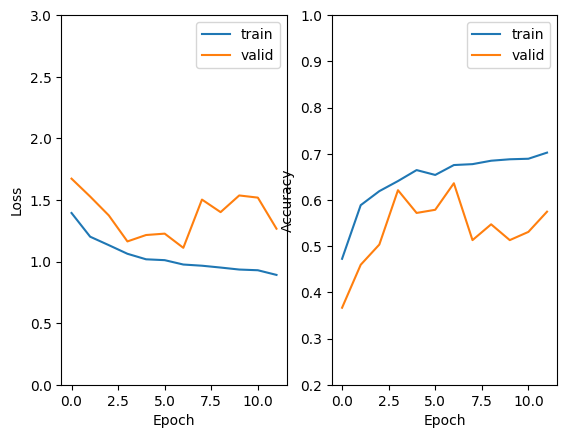

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim([0.0, 3.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim([0.2, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

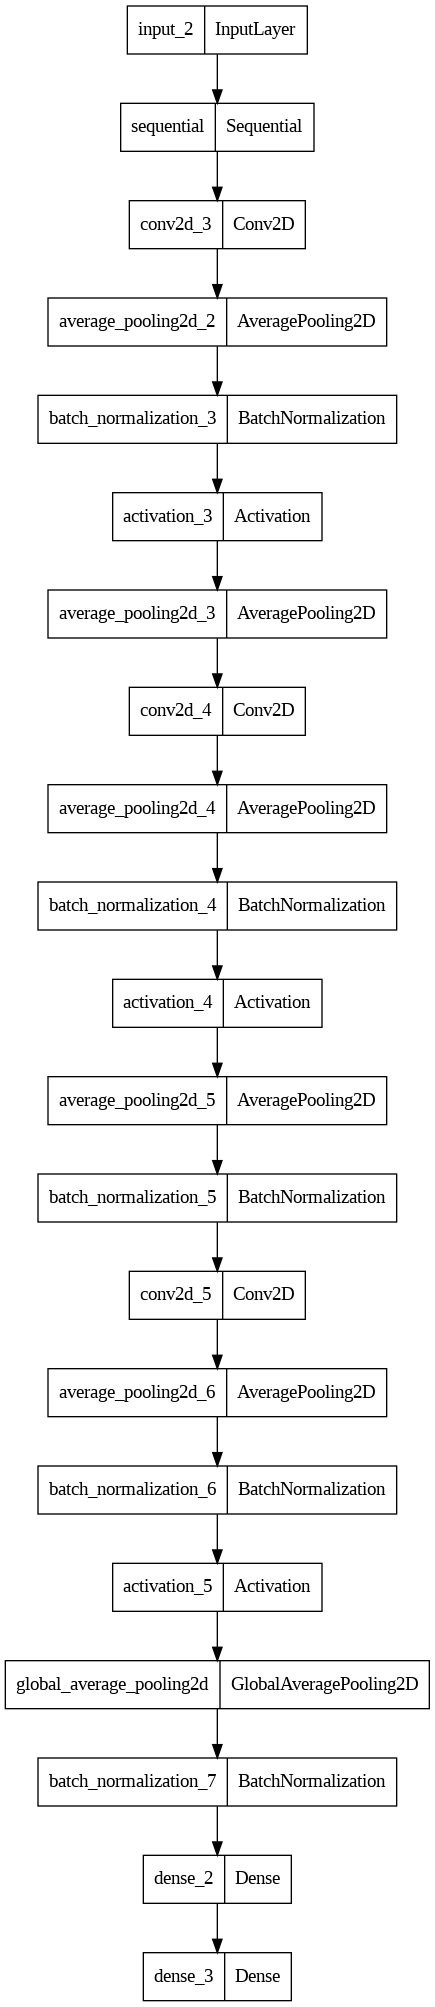

In [ ]:
keras.utils.plot_model(net1, to_file="net1.png")

In [ ]:
net1.save('/content/drive/MyDrive/Deep_Learning/net1.h5')

### FROM SCRATCH - ADAM

In [ ]:
inputs = keras.Input((224,224,3))
x = inputs
##

x = data_augmentation(x)
#A preprocessing layer which rescales input values to a new range.
x = keras.layers.Rescaling(1./255)(x) #To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./255.

x = keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D()(x)


x = keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D()(x)

x = keras.layers.Dropout(0.2)(x)
x = keras.layers.GlobalMaxPooling2D()(x)
#Reshaping layer
x = keras.layers.Flatten()(x) #Does not affect the batch size.
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(300, activation='relu')(x)
x  = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(num_classes, activation="softmax",kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
netAd = keras.Model(inputs, outputs)

In [ ]:
netAd.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
history = netAd.fit(train_dataset,
                 epochs=80,
                 validation_data=val_dataset,
                 verbose=2,
                 callbacks=[callback])

Epoch 1/80
81/81 - 23s - loss: 1.7653 - accuracy: 0.4145 - val_loss: 1.5435 - val_accuracy: 0.3447 - 23s/epoch - 285ms/step
Epoch 2/80
81/81 - 17s - loss: 1.1027 - accuracy: 0.5684 - val_loss: 1.5310 - val_accuracy: 0.3201 - 17s/epoch - 212ms/step
Epoch 3/80
81/81 - 16s - loss: 0.9854 - accuracy: 0.6093 - val_loss: 1.4149 - val_accuracy: 0.3516 - 16s/epoch - 197ms/step
Epoch 4/80
81/81 - 16s - loss: 0.9155 - accuracy: 0.6490 - val_loss: 1.3852 - val_accuracy: 0.3844 - 16s/epoch - 197ms/step
Epoch 5/80
81/81 - 16s - loss: 0.9237 - accuracy: 0.6432 - val_loss: 1.0837 - val_accuracy: 0.5896 - 16s/epoch - 197ms/step
Epoch 6/80
81/81 - 16s - loss: 0.8649 - accuracy: 0.6704 - val_loss: 1.0075 - val_accuracy: 0.6580 - 16s/epoch - 197ms/step
Epoch 7/80
81/81 - 16s - loss: 0.8186 - accuracy: 0.6872 - val_loss: 0.8458 - val_accuracy: 0.7004 - 16s/epoch - 196ms/step
Epoch 8/80
81/81 - 16s - loss: 0.7905 - accuracy: 0.6907 - val_loss: 0.8411 - val_accuracy: 0.6949 - 16s/epoch - 197ms/step
Epoch 9/

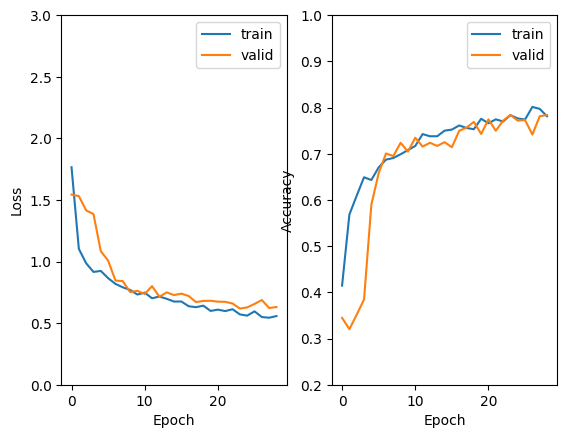

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim([0.0, 3.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim([0.2, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

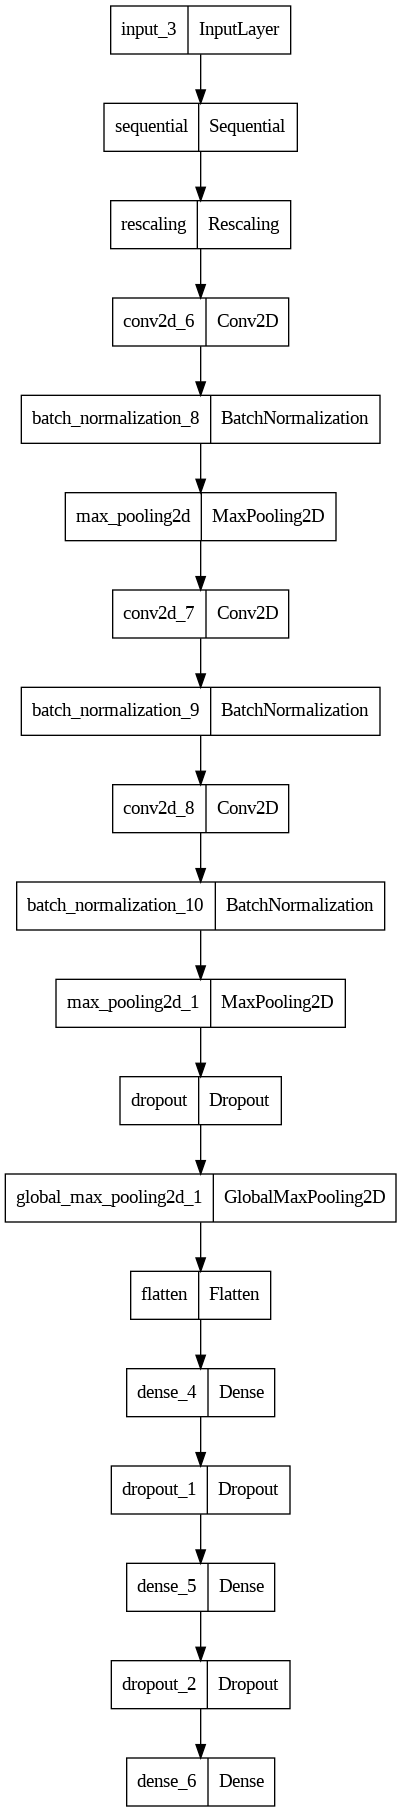

In [ ]:
keras.utils.plot_model(netAd, to_file="netAd.png")

In [ ]:
netAd.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                         

In [ ]:
netAd.save('/content/drive/MyDrive/Deep_Learning/netAd.h5')

In [ ]:
loss, accuracy = netAd.evaluate(test_dataset)

12/12 [==============================] - 1s 85ms/step - loss: 0.6096 - accuracy: 0.7849


In [ ]:
errate=0
for images, labels in test_dataset:
    for i in range(images.shape[0]):
        predictions = netAd.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(score)] != class_names[np.argmax(labels[i], axis=None, out=None)]:
          errate+=1
errate

1/1 [==============================] - 0s 27ms/step


80

**The Best one**

### FROM SCratch 2

In [ ]:
inputs = keras.Input((224,224,3))
x = inputs
##
x = data_augmentation(x)
#A preprocessing layer which rescales input values to a new range.
x = keras.layers.Rescaling(1./255)(x) #To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./255.

x = keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D()(x)

x = keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)

x = keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D()(x)

x = keras.layers.Dropout(0.2)(x)
x = keras.layers.GlobalMaxPooling2D()(x)
#Reshaping layer
x = keras.layers.Flatten()(x) #Does not affect the batch size.
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
outputs = keras.layers.Dense(num_classes, activation="softmax",kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
netAd2 = keras.Model(inputs, outputs)

In [ ]:
netAd2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 128)     73856     
                                                           

In [ ]:
netAd2.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
            metrics=['accuracy'])

In [ ]:
history = netAd2.fit(train_dataset,
                 epochs=80,
                 validation_data=val_dataset,
                 verbose=1,
                 callbacks=[callback])

Epoch 1/80
81/81 [==============================] - 26s 265ms/step - loss: 1.5758 - accuracy: 0.3210 - val_loss: 1.5172 - val_accuracy: 0.4350
Epoch 2/80
81/81 [==============================] - 20s 244ms/step - loss: 1.3349 - accuracy: 0.4749 - val_loss: 1.2317 - val_accuracy: 0.5349
Epoch 3/80
81/81 [==============================] - 20s 245ms/step - loss: 1.1295 - accuracy: 0.5427 - val_loss: 1.0893 - val_accuracy: 0.6389
Epoch 4/80
81/81 [==============================] - 20s 243ms/step - loss: 1.0558 - accuracy: 0.5789 - val_loss: 1.0418 - val_accuracy: 0.6074
Epoch 5/80
81/81 [==============================] - 20s 248ms/step - loss: 1.0140 - accuracy: 0.5999 - val_loss: 1.0216 - val_accuracy: 0.5882
Epoch 6/80
81/81 [==============================] - 21s 257ms/step - loss: 0.9663 - accuracy: 0.6241 - val_loss: 1.0283 - val_accuracy: 0.6060
Epoch 7/80
81/81 [==============================] - 20s 246ms/step - loss: 0.9470 - accuracy: 0.6315 - val_loss: 0.9940 - val_accuracy: 0.6060

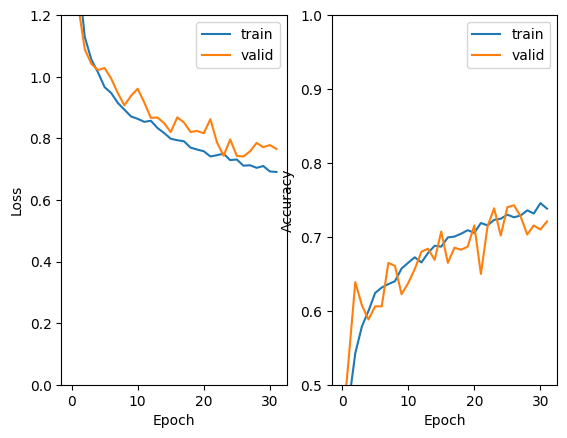

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim([0.0, 1.2])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

In [ ]:
netAd2.save('/content/drive/MyDrive/Deep_Learning/netAd2.h5')

In [ ]:
loss, accuracy = netAd2.evaluate(test_dataset)

12/12 [==============================] - 2s 104ms/step - loss: 0.7455 - accuracy: 0.7285


In [ ]:
inputs = keras.Input((224,224,3))
x = inputs

x = data_augmentation(x)

x = keras.layers.Conv2D(128, 5, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x= keras.layers.AveragePooling2D(3, strides=1, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

block_1= keras.layers.MaxPooling2D(3, strides=1, padding="same")(x)

x = keras.layers.Conv2D(128, 5, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.AveragePooling2D(3, strides=1, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.Conv2D(128, 5, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.AveragePooling2D(3, strides=1, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

##x = keras.layers.MaxPooling2D(3, strides=1, padding="same")(x)

#x = keras.layers.Conv2D(128, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
#x = keras.layers.BatchNormalization()(x)
#x = keras.layers.Activation("relu")(x)

block_2 = layers.add([x, block_1])

x = keras.layers.MaxPooling2D(3, strides=1, padding="same")(block_2)

x = keras.layers.Conv2D(128, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)


block_3 = layers.add([x, block_2])

x = keras.layers.Conv2D(64, 5, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(block_3)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Flatten()(x)

x = keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
#x = keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
#x = keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
netBlock = keras.Model(inputs, outputs)